In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive.zip'
extract_path = '/content/corona_tweet'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import pandas as pd

# Load the training and test datasets
train_path = '/content/corona_tweet/Corona_NLP_train.csv'
test_path = '/content/corona_tweet/Corona_NLP_test.csv'

df_train = pd.read_csv(train_path, encoding='latin1')
df_test = pd.read_csv(test_path, encoding='latin1')

# Display the first 5 rows of the training and test data
print("Training data:")
print(df_train.head())

print("\nTest data:")
print(df_test.head())



Training data:
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  

Test data:
   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  N

In [ ]:
!pip install contractions

import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('stopwords')

train_path = '/content/corona_tweet/Corona_NLP_train.csv'
test_path = '/content/corona_tweet/Corona_NLP_test.csv'

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+', ' ', tweet)
    tweet = re.sub(r'@\w+', ' ', tweet)
    tweet = re.sub(r'#\w+', ' ', tweet)
    tweet = re.sub(r'[^\w\s]', ' ', tweet)
    tweet = re.sub(r'\d+', ' ', tweet)
    tweet = ' '.join([
        lemmatizer.lemmatize(word)
        for word in tweet.split() if word not in stop_words
    ])
    return tweet

df_train['cleaned_tweet'] = df_train['OriginalTweet'].apply(clean_and_lemmatize)
df_test['cleaned_tweet'] = df_test['OriginalTweet'].apply(clean_and_lemmatize)

# Display the cleaned text in the training data
print("\nCleaned Training Data:")
print(df_train[['OriginalTweet', 'cleaned_tweet']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Cleaned Training Data:
                                       OriginalTweet  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
1  advice Talk to your neighbours family to excha...   
2  Coronavirus Australia: Woolworths to give elde...   
3  My food stock is not the only one which is emp...   
4  Me, ready to go at supermarket during the #COV...   

                                       cleaned_tweet  
0                                                     
1  advice talk neighbour family exchange phone nu...  
2  coronavirus australia woolworth give elderly d...  
3  food stock one empty please panic enough food ...  
4  ready go supermarket outbreak paranoid food st...  


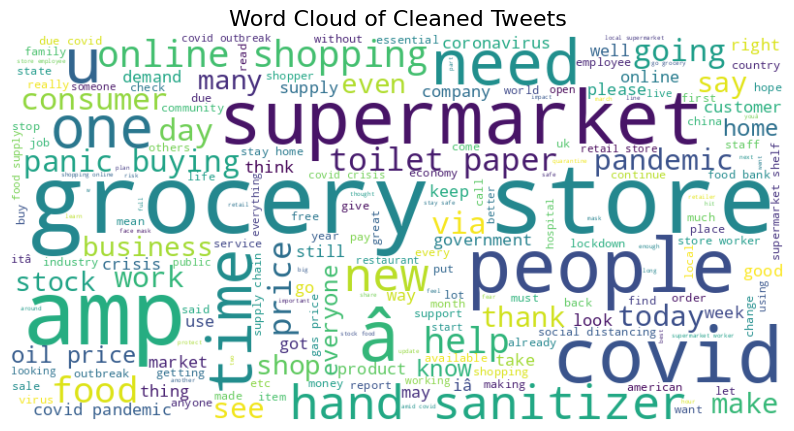

In [ ]:
#worldcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join all the cleaned tweets to form a single text
all_cleaned_tweets = ' '.join(df_train['cleaned_tweet'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_tweets)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Tweets", fontsize=16)
plt.show()


<ipython-input-37-7fd47bdd15ee>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


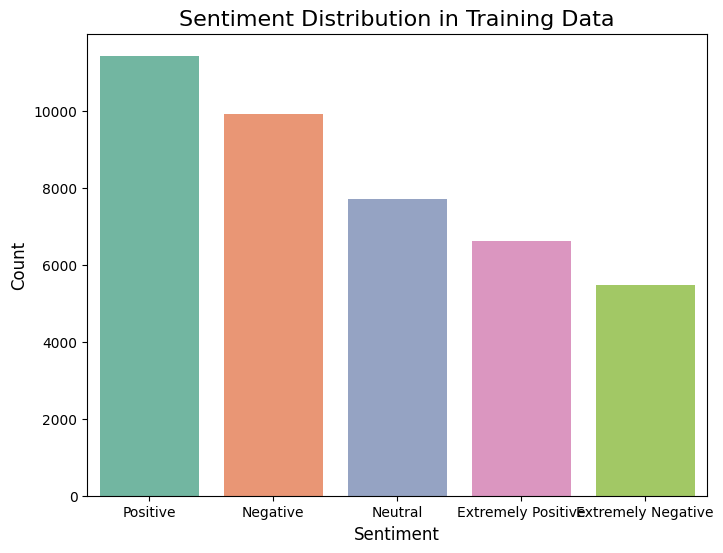

In [ ]:
#distribution figure
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of sentiments in the dataset
sentiment_counts = df_train['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title("Sentiment Distribution in Training Data", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


In [ ]:
#data preparation
X_train = df_train['cleaned_tweet']
X_test = df_test['cleaned_tweet']

# Prepare the labels (y) by encoding the Sentiment column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(df_train['Sentiment'])
y_test = label_encoder.transform(df_test['Sentiment'])

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (41157,)
Shape of X_test: (3798,)
Shape of y_train: (41157,)
Shape of y_test: (3798,)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform length
max_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

# Check the shape of the padded sequences
print(f"Shape of X_train_padded: {X_train_padded.shape}")
print(f"Shape of X_test_padded: {X_test_padded.shape}")


Shape of X_train_padded: (41157, 100)
Shape of X_test_padded: (3798, 100)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Define the model
simple_rnn_model = Sequential()
simple_rnn_model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
simple_rnn_model.add(SimpleRNN(units=64, activation='tanh'))
simple_rnn_model.add(Dropout(0.5))
simple_rnn_model.add(Dense(5, activation='softmax'))
simple_rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

simple_rnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history_rnn = simple_rnn_model.fit(
    X_train_padded, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 50s 37ms/step - accuracy: 0.2632 - loss: 1.5869 - val_accuracy: 0.2493 - val_loss: 1.5851
Epoch 2/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.2731 - loss: 1.5788 - val_accuracy: 0.2493 - val_loss: 1.5871
Epoch 3/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.2716 - loss: 1.5913 - val_accuracy: 0.2493 - val_loss: 1.5853
Epoch 4/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 49s 38ms/step - accuracy: 0.2695 - loss: 1.5804 - val_accuracy: 0.2493 - val_loss: 1.5882
Epoch 5/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.2728 - loss: 1.5781 - val_accuracy: 0.2493 - val_loss: 1.5870


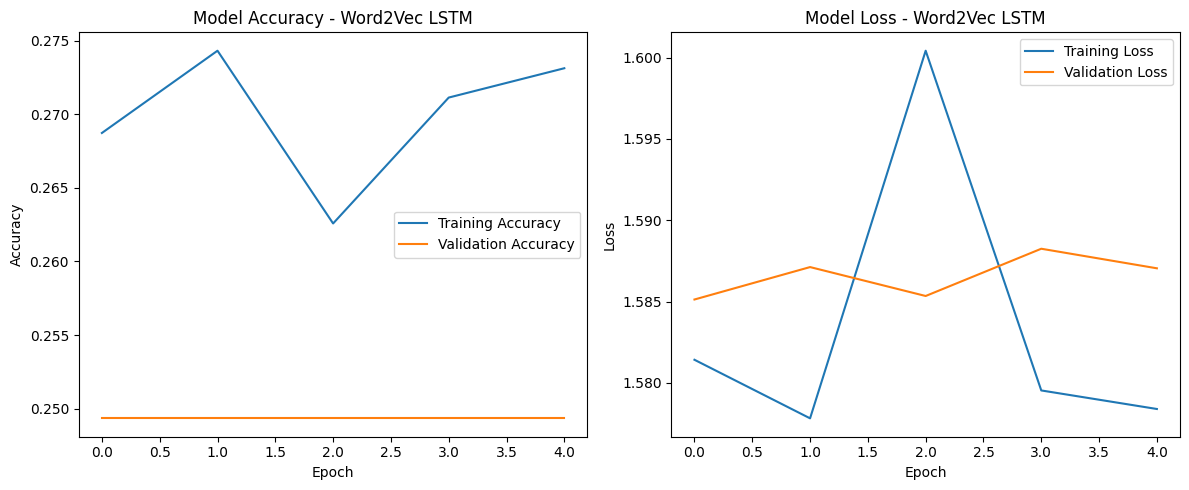

In [ ]:
# Plotting Training & Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy - Word2Vec LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - Word2Vec LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Making predictions
y_pred = simple_rnn_model.predict(X_test_padded)

y_pred_labels = label_encoder.inverse_transform(y_pred.argmax(axis=1))

print("Predictions:", y_pred_labels[:10])


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Predictions: ['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive']


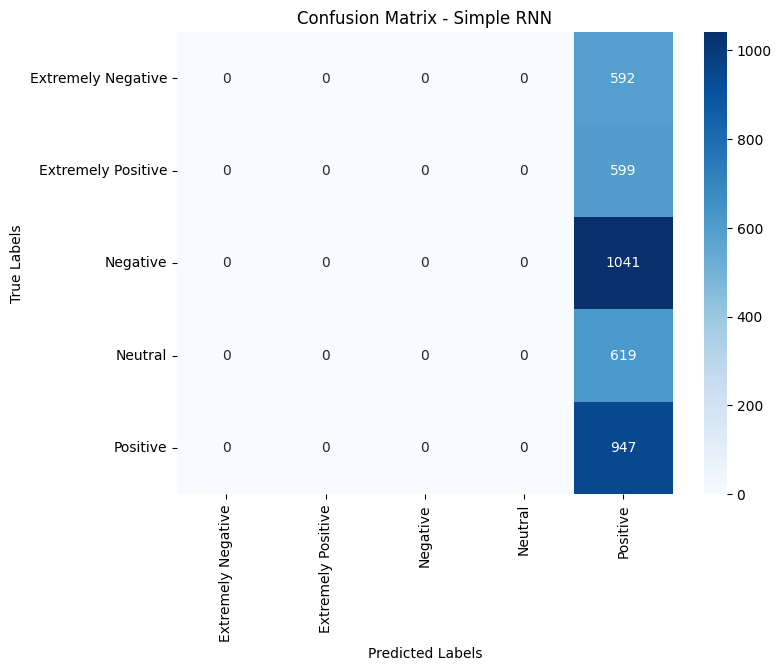

Classification Report:

                    precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00       592
Extremely Positive       0.00      0.00      0.00       599
          Negative       0.00      0.00      0.00      1041
           Neutral       0.00      0.00      0.00       619
          Positive       0.25      1.00      0.40       947

          accuracy                           0.25      3798
         macro avg       0.05      0.20      0.08      3798
      weighted avg       0.06      0.25      0.10      3798



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_labels = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Simple RNN')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

In [ ]:
#Model 2: LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, trainable=True))
lstm_model.add(LSTM(units=64, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(5, activation='softmax'))

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Model training
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

history_lstm = lstm_model.fit(
    X_train_padded, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_padded, y_test),
    callbacks=[early_stop]
)

Epoch 1/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 131s 99ms/step - accuracy: 0.2710 - loss: 1.5803 - val_accuracy: 0.2493 - val_loss: 1.5867
Epoch 2/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 140s 98ms/step - accuracy: 0.2759 - loss: 1.5782 - val_accuracy: 0.2493 - val_loss: 1.5890
Epoch 3/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 144s 99ms/step - accuracy: 0.2806 - loss: 1.5756 - val_accuracy: 0.2493 - val_loss: 1.5836
Epoch 4/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 139s 97ms/step - accuracy: 0.2777 - loss: 1.5770 - val_accuracy: 0.2493 - val_loss: 1.5852
Epoch 5/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 144s 98ms/step - accuracy: 0.2770 - loss: 1.5754 - val_accuracy: 0.2493 - val_loss: 1.5873


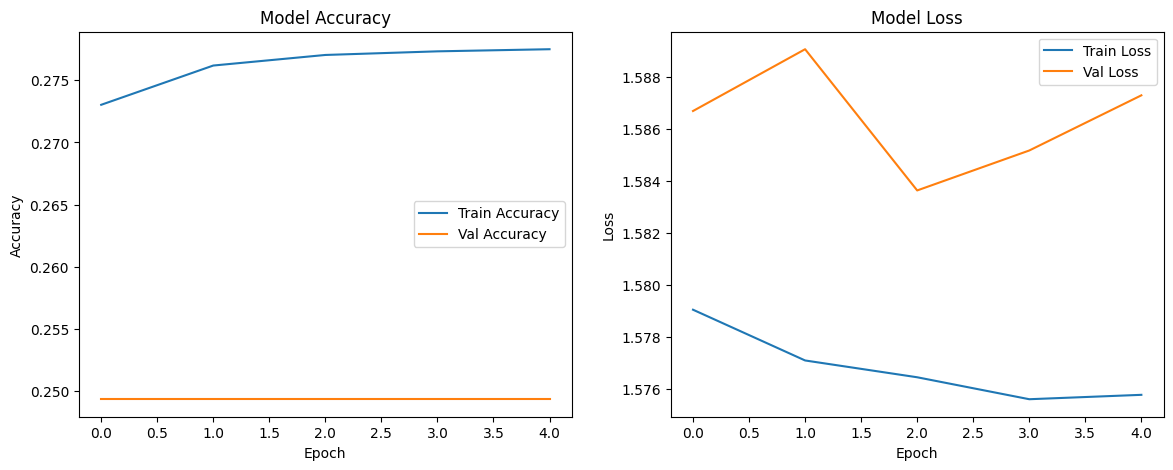

In [ ]:
#Accuracy and loss curves
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Predict class probabilities
y_pred_probs = lstm_model.predict(X_test_padded)

y_pred_classes = y_pred_probs.argmax(axis=1)

y_true_classes = y_test



119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00       592
Extremely Positive       0.00      0.00      0.00       599
          Negative       0.00      0.00      0.00      1041
           Neutral       0.00      0.00      0.00       619
          Positive       0.25      1.00      0.40       947

          accuracy                           0.25      3798
         macro avg       0.05      0.20      0.08      3798
      weighted avg       0.06      0.25      0.10      3798



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


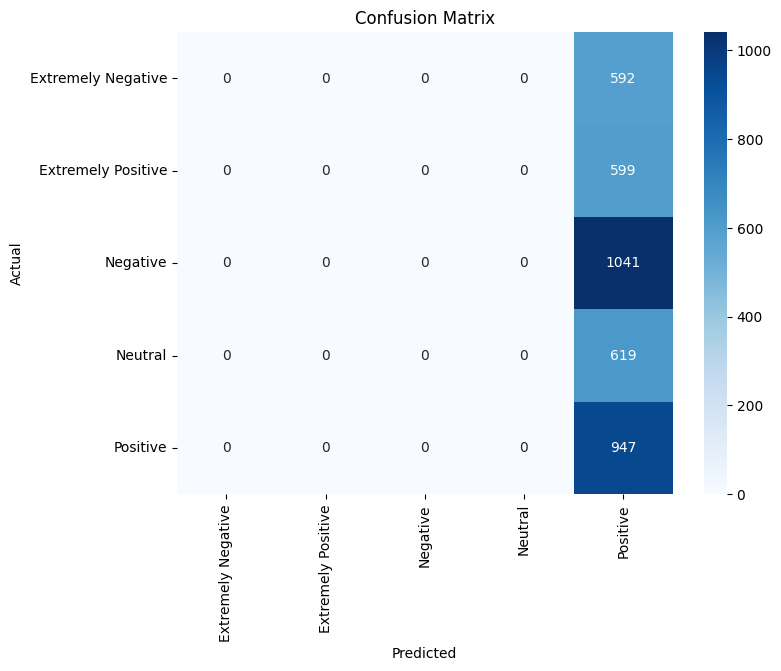

In [ ]:
#classification report and conusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import gensim.downloader as api

#loading pretrained Word2Vec
w2v_model = api.load("word2vec-google-news-300")
embedding_dim = 300


In [ ]:
import gensim.downloader as api
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

#Google News pretrained Word2Vec embeddings
w2v_model = api.load("word2vec-google-news-300")
embedding_dim = 300

# Prepare embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size and word in w2v_model:
        embedding_matrix[i] = w2v_model[word]

# Define LSTM model with pretrained Word2Vec embeddings
w2v_lstm_model = Sequential()
w2v_lstm_model.add(Embedding(input_dim=vocab_size,
                             output_dim=embedding_dim,
                             input_length=max_length,
                             weights=[embedding_matrix],
                             trainable=False))
w2v_lstm_model.add(LSTM(64, return_sequences=False))
w2v_lstm_model.add(Dropout(0.5))
w2v_lstm_model.add(Dense(5, activation='softmax'))

w2v_lstm_model.compile(loss='sparse_categorical_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

w2v_lstm_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │     9,024,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,024,300 (34.42 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,024,300 (34.42 MB)

In [ ]:
# Training the model
history_w2v_lstm = w2v_lstm_model.fit(
    X_train_padded, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_padded, y_test),
    callbacks=[early_stop]
)

Epoch 1/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 157s 119ms/step - accuracy: 0.2665 - loss: 1.5803 - val_accuracy: 0.2493 - val_loss: 1.5847
Epoch 2/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 191s 111ms/step - accuracy: 0.2772 - loss: 1.5778 - val_accuracy: 0.2493 - val_loss: 1.5868
Epoch 3/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 208s 115ms/step - accuracy: 0.2737 - loss: 1.5776 - val_accuracy: 0.2493 - val_loss: 1.5843
Epoch 4/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 197s 111ms/step - accuracy: 0.2780 - loss: 1.5770 - val_accuracy: 0.2493 - val_loss: 1.5853
Epoch 5/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 144s 112ms/step - accuracy: 0.2823 - loss: 1.5728 - val_accuracy: 0.2493 - val_loss: 1.5855


119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00       592
Extremely Positive       0.00      0.00      0.00       599
          Negative       0.00      0.00      0.00      1041
           Neutral       0.00      0.00      0.00       619
          Positive       0.25      1.00      0.40       947

          accuracy                           0.25      3798
         macro avg       0.05      0.20      0.08      3798
      weighted avg       0.06      0.25      0.10      3798



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


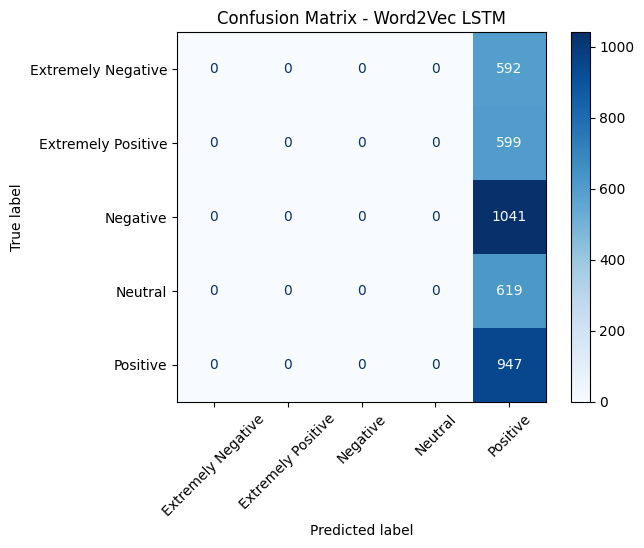

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = w2v_lstm_model.predict(X_test_padded)

y_pred_classes = y_pred_probs.argmax(axis=1)
y_true_classes = y_test

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - Word2Vec LSTM")
plt.show()


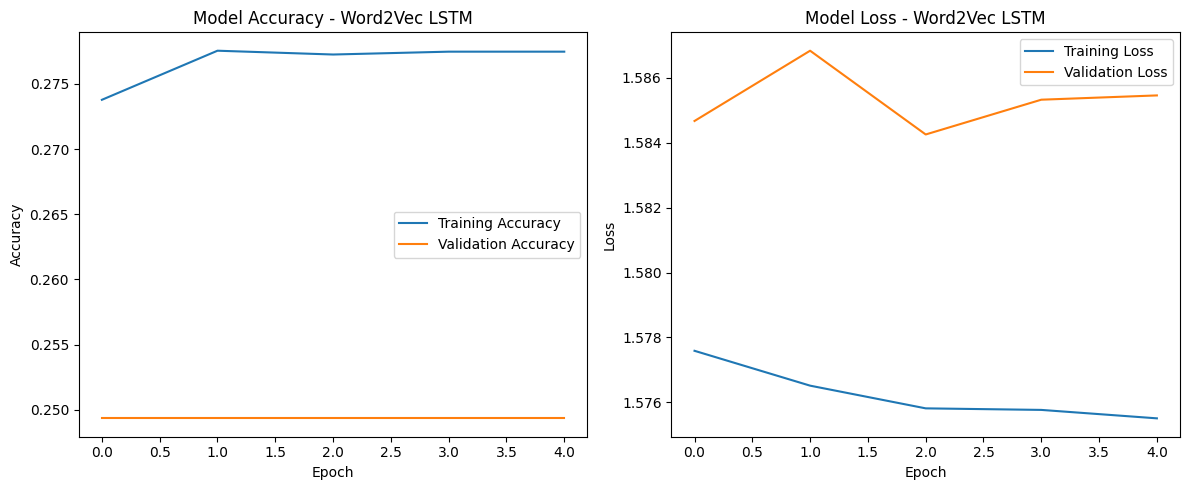

In [ ]:
# Plotting Training & Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_w2v_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_w2v_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy - Word2Vec LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_w2v_lstm.history['loss'], label='Training Loss')
plt.plot(history_w2v_lstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - Word2Vec LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Model Comparison
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Simple RNN": (simple_rnn_model, y_test, X_test_padded, label_encoder),
    "LSTM (Trainable Embeddings)": (lstm_model, y_test, X_test_padded, label_encoder),
    "LSTM (Word2Vec Embeddings)": (w2v_lstm_model, y_test, X_test_padded, label_encoder)
}

for name, (model, y_true, X_input, le) in models.items():
    y_pred_probs = model.predict(X_input)
    y_pred_classes = y_pred_probs.argmax(axis=1)

    acc = accuracy_score(y_true, y_pred_classes)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_true, y_pred_classes, target_names=le.classes_))


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Simple RNN Accuracy: 0.2493
Classification Report for Simple RNN:

                    precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00       592
Extremely Positive       0.00      0.00      0.00       599
          Negative       0.00      0.00      0.00      1041
           Neutral       0.00      0.00      0.00       619
          Positive       0.25      1.00      0.40       947

          accuracy                           0.25      3798
         macro avg       0.05      0.20      0.08      3798
      weighted avg       0.06      0.25      0.10      3798

  7/119 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step

LSTM (Trainable Embeddings) Accuracy: 0.2493
Classification Report for LSTM (Trainable Embeddings):

                    precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00       592
Extremely Positive       0.00      0.00      0.00       599
          Negative       0.00      0.00      0.00      1041
           Neutral       0.00      0.00      0.00       619
          Positive       0.25      1.00      0.40       947

          accuracy                           0.25      3798
         macro avg       0.05      0.20      0.08      3798
      weighted avg       0.06      0.25      0.10      3798

  2/119 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step

LSTM (Word2Vec Embeddings) Accuracy: 0.2493
Classification Report for LSTM (Word2Vec Embeddings):

                    precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00       592
Extremely Positive       0.00      0.00      0.00       599
          Negative       0.00      0.00      0.00      1041
           Neutral       0.00      0.00      0.00       619
          Positive       0.25      1.00      0.40       947

          accuracy                           0.25      3798
         macro avg       0.05      0.20      0.08      3798
      weighted avg       0.06      0.25      0.10      3798



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step


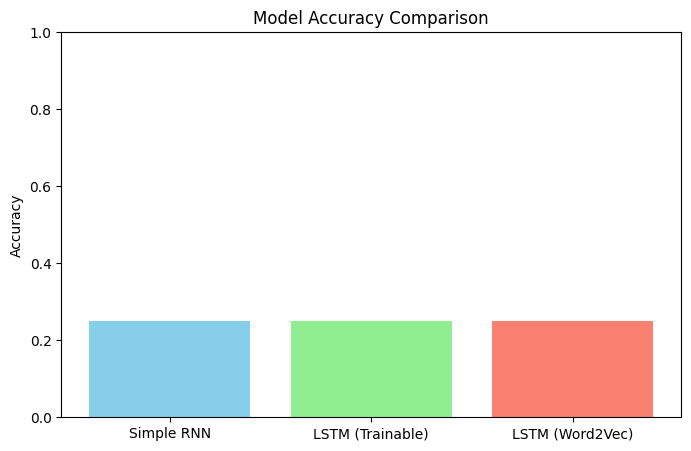

In [ ]:
#Visual accuracy comparison
import matplotlib.pyplot as plt

accuracies = [
    accuracy_score(y_test, simple_rnn_model.predict(X_test_padded).argmax(axis=1)),
    accuracy_score(y_test, lstm_model.predict(X_test_padded).argmax(axis=1)),
    accuracy_score(y_test, w2v_lstm_model.predict(X_test_padded).argmax(axis=1))
]

model_names = ['Simple RNN', 'LSTM (Trainable)', 'LSTM (Word2Vec)']

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [58]:
!pip install -q gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.8 MB/s eta 0:00:00


In [59]:
import gradio as gr
import numpy as np

def preprocess_input(text):
    text = clean_and_lemmatize(text)
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
    return padded

# Predict function
def predict_sentiment(text):
    processed = preprocess_input(text)
    prediction = lstm_model.predict(processed)
    label_index = np.argmax(prediction, axis=1)[0]
    label_map = {0: "Extremely Negative", 1: "Negative", 2: "Neutral", 3: "Positive", 4: "Extremely Positive"}
    return label_map[label_index]


In [60]:
#GUI for tweet input
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter a tweet..."),
    outputs="text",
    title="Tweet Sentiment Classifier",
    description="Enter a tweet to analyze its sentiment using the trained LSTM model."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0f3a321279c2b6c118.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
